In [14]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [15]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('df_agg_cluster_1.xlsx', sheet_name='Sheet1')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeça  \
365    NaN  171.64               19.6                16.9                 5.3   
366    NaN  173.27               19.2                16.6                 5.0   
367    NaN  151.10               19.3                16.2                 5.5   
368    NaN  185.16               20.5                17.3                 5.5   
369    NaN  186.74               19.5                17.0                 5.5   
370    NaN  125.02               18.5                15.3                 5.9   
371    NaN  189.02               21.2                17.6                 5.5   
372    NaN  191.20               20.6                17.2                 5.5   
373    NaN  130.10               19.3                16.6                 5.0   
374    NaN  164.67               20.7                17.6                 5.5   

     altura  espessura  KMeans_Labels  Agglomerative_Labels  
365     6.3        2.5              1         

In [3]:
# Dropping the columns
df2 = df.drop(columns=[
'Index',
'espessura',
'Agglomerative_Labels',
'KMeans_Labels'
])
df2.head()

,peso,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura
0,51.45,14.3,12.2,4.0,4.1
1,37.15,12.4,10.9,3.8,3.2
2,47.26,13.7,11.2,3.4,4.0
3,36.67,12.9,11.1,3.7,3.7
4,45.48,13.2,11.3,3.8,4.5


In [4]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [5]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df2,  target = 'peso', train_size=0.8)
best_model = exp2.compare_models()

,Description,Value
0,Session id,2267
1,Target,peso
2,Target type,Regression
3,Original data shape,"(375, 5)"
4,Transformed data shape,"(375, 5)"
5,Transformed train set shape,"(262, 5)"
6,Transformed test set shape,"(113, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.2827,46.2974,6.4849,0.9732,0.0588,0.0466,0.0380
rf,Random Forest Regressor,4.5309,50.6977,6.8497,0.9708,0.0617,0.0492,0.0500
lightgbm,Light Gradient Boosting Machine,4.8803,58.0145,7.2836,0.9670,0.0658,0.0528,0.0410
ada,AdaBoost Regressor,5.0914,58.6495,7.3228,0.9665,0.0776,0.0624,0.0280
gbr,Gradient Boosting Regressor,4.6958,58.9975,7.2688,0.9664,0.0647,0.0506,0.0250
xgboost,Extreme Gradient Boosting,5.0585,61.5382,7.4753,0.9646,0.0674,0.0541,0.0490
lar,Least Angle Regression,6.2564,68.6221,8.1326,0.9603,0.1296,0.0880,0.0090
lr,Linear Regression,6.2564,68.6209,8.1325,0.9603,0.1296,0.0880,0.8970
huber,Huber Regressor,6.1003,70.4329,8.1622,0.9601,0.1153,0.0817,0.0110
br,Bayesian Ridge,6.2944,69.8861,8.2207,0.9595,0.1290,0.0881,0.0090


In [6]:
rf = exp2.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.1588,37.0020,6.0829,0.9835,0.0546,0.0470
1,4.9397,44.3900,6.6626,0.9718,0.0578,0.0484
2,6.2989,122.6402,11.0743,0.9461,0.0732,0.0544
3,4.9307,47.8113,6.9146,0.9684,0.0624,0.0502
4,3.3812,27.6042,5.2540,0.9864,0.0474,0.0371
5,4.4107,40.7153,6.3809,0.9712,0.0625,0.0489
6,4.9978,81.7037,9.0390,0.9486,0.0718,0.0467
7,3.6228,25.1041,5.0104,0.9784,0.0485,0.0424
8,2.6622,13.9265,3.7318,0.9879,0.0592,0.0466


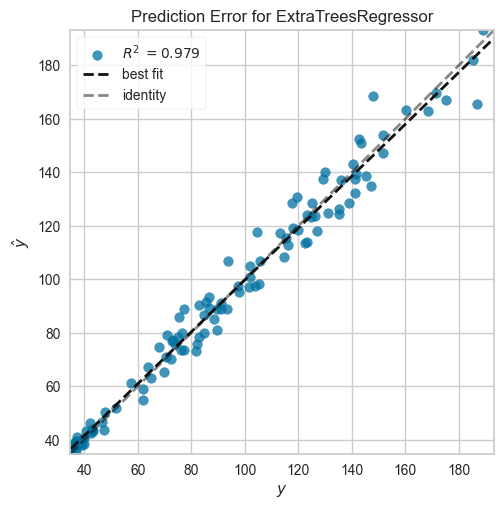

In [7]:
exp2.plot_model(rf, plot = 'error')

In [8]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [9]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,4.5028,36.4636,6.0385,0.9791,0.0585,0.0486


,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
318,16.700001,14.4,4.7,5.1,101.519997,97.116700
127,15.900000,13.8,4.1,5.1,86.620003,89.366300
65,13.200000,11.1,3.3,4.0,40.840000,43.271900
269,20.000000,16.1,5.1,5.4,142.539993,152.415400
115,13.000000,11.1,3.4,3.9,36.889999,39.184800
254,18.200001,14.8,5.3,5.3,119.919998,118.339999
52,12.500000,10.8,3.0,3.9,38.360001,38.307800
310,18.500000,15.7,5.0,5.1,124.599998,123.306201
207,16.299999,13.7,4.3,5.0,91.019997,91.346000
344,18.500000,15.4,4.9,5.1,123.209999,124.038899


In [10]:
peso_pred_semEspe.head()

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
308,18.200001,15.1,4.6,4.9,104.610001,117.822401
352,18.200001,15.7,5.0,5.4,131.190002,124.822301
11,14.200000,12.1,3.9,4.1,51.900002,51.839501
87,12.200000,10.2,3.1,3.8,34.880001,34.882499
15,12.400000,10.5,3.4,3.7,36.820000,36.739800


# Continuidade do Modelo

In [11]:
### Saving model 

#save_model(rf, 'rf_weight') 


In [12]:
################### LOADING MODEL
saved_rf = load_model('rf_weight') 

saved_rf 

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\crist\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['comprimento_Total',
                                             'comprimento_Padrao',
                                             'comprimento_Cabeca', 'altura'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=8604))])

In [13]:
exp2.predict_model(saved_rf)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- comprimento_Cabeça
Feature names seen at fit time, yet now missing:
- comprimento_Cabeca


In [13]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)